# Track potential density inversion in the original WOA23 dataset 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import gsw as gsw
from netCDF4 import Dataset


from matplotlib import rcParams
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
! date

Thu Apr 10 17:24:05 CEST 2025


In [3]:
def Arc_Bat(ztype='isol1000') :
        locpath='/data0/project/drakkar/CONFIGS/CREG025.L75/GRID/'
        locfile='CREG025.L75_domain_cfg.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['bathy_meter'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='black', alpha=1.)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [4]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        #rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'socurl' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=0
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,3,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return m

>>>> # UNITS CONVERSION

In [5]:
INDIR='/data0/project/drakkar/REFERENCE_DATA/WOA2023/DATA/0.25degx0.25deg/'
ds_inT=xr.open_mfdataset(INDIR+'woa23_decav_t01_04.nc',decode_times=False)
ds_inT
ds_inS=xr.open_mfdataset(INDIR+'woa23_decav_s01_04.nc',decode_times=False)
ds_inS

<xarray.Dataset>
Dimensions:             (lat: 720, nbounds: 2, lon: 1440, depth: 57, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 1.45e+03 1.5e+03
  * time                (time) float32 396.5
Dimensions without coordinates: nbounds
Data variables: (12/15)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
    depth_bnds          (depth, nbounds) float32 dask.array<chunksize=(57, 2), meta=np.ndarray>
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    s_an                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
    ...                  ...
    s_se                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
    s_oa                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
    s_ma                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
    s_gp                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
    s_sdo               (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
    s_sea               (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : sea_water_pract...
    summary:                         Climatological mean salinity for the glo...
    references:                      Reagan, J.R., D. Seidov, Z. Wang, D. Duk...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2024-01-28 
    date_modified:                   2024-01-28

In [6]:
# Add the geographical coordinates
ds_IN=xr.Dataset()
ds_IN['s_an']=(('time','depth','lat','lon'),ds_inS['s_an'].data)
ds_IN['t_an']=(('time','depth','lat','lon'),ds_inT['t_an'].data)
ds_IN.coords['lat']=ds_inS['lat']
ds_IN.coords['lon']=ds_inS['lon']
ds_IN.coords['depth']=ds_inS['depth']
ds_IN.coords['time']=ds_inS['time']
ds_IN

<xarray.Dataset>
Dimensions:  (time: 1, depth: 57, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
  * time     (time) float32 396.5
Data variables:
    s_an     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>
    t_an     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 19, 240, 480), meta=np.ndarray>

In [12]:
lat2D=np.tile(ds_IN['lat'],(ds_IN.sizes['lon'],1)).T
lat3D=np.tile(lat2D,(57,1,1))

zplt=np.reshape(ds_IN['depth'].data,(57,1,1))
zplt.shape
# Duplicate this depth to fit the T/S on a global grid
z3D=np.tile(zplt,(1,ds_IN.sizes['lat'],ds_IN.sizes['lon']))
z3D.shape

(57, 720, 1440)

In [13]:
zlon=np.reshape(ds_IN['lon'].data,(1,ds_IN.sizes['lon']))
lon2D=np.tile(zlon,(ds_IN.sizes['lat'],1))
lon2D.shape


(720, 1440)

In [14]:
# Define a pressure from depth
pressure=gsw.p_from_z(-z3D,lat3D)

ds_IN['SA']=gsw.conversions.SA_from_SP(ds_IN['s_an'],pressure,ds_IN['lon'],ds_IN['lat'])
ds_IN['CT']=gsw.conversions.CT_from_pt(ds_IN['SA'],ds_IN['t_an'])

# Compute the Brunt-Vaissalla frequency
DINT_N2,p_imd=gsw.Nsquared(ds_IN['SA'].isel(time=0).values,\
                           ds_IN['CT'].isel(time=0).values,\
                           pressure,axis=0)

ds_N2=xr.Dataset()
ds_N2['N2']=(('depth','lat','lon'),DINT_N2)
ds_N2.coords['lat']=ds_IN['lat']
ds_N2.coords['lon']=ds_IN['lon']
ds_N2.coords['depth']=ds_IN['depth'].isel(depth=slice(0,56))

# Build a 2D map to see how many instabilities occur on each water column
num_DINT_N2=np.where(DINT_N2 < 0.,1.,0.)
# Remove the grid points in the first 50m
num_DINT_N2[0:11,:,:]=0. 
ds_IN['Instab']=(('lat','lon'),np.sum(num_DINT_N2,axis=0))
ds_IN['Instab']=xr.where(np.isnan(ds_IN['CT'].isel(time=0,depth=0)),np.nan,ds_IN['Instab'])

In [15]:
ds_N2

<xarray.Dataset>
Dimensions:  (depth: 56, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.35e+03 1.4e+03 1.45e+03
Data variables:
    N2       (depth, lat, lon) float64 nan nan nan ... -3.735e-08 -3.736e-08

Text(0.5, 1.0, 'WOA23 original dataset \n # grid points with instabilities over the first 1500m')

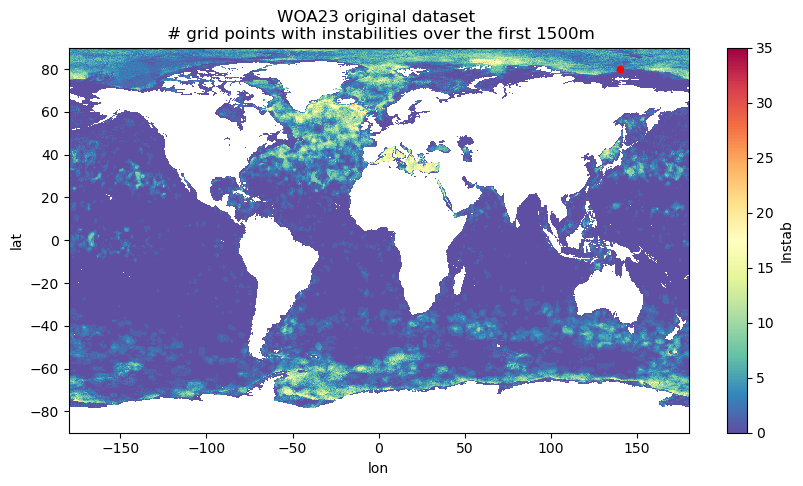

In [20]:
plt.figure(figsize=(10,5))
ds_IN['Instab'].plot(cmap='Spectral_r',vmax=35)
# Latitude & longitude
loc_x=140  ;  loc_y=80
#loc_x=120  ;  loc_y=78
plt.scatter(loc_x,loc_y,20,marker='o', color='r')
plt.title( 'WOA23 original dataset \n # grid points with instabilities over the first 1500m')

/tmp/ipykernel_4104/2790957951.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')


Text(0.5, 1.0, 'WOA23 original dataset z57 0.25deg \n # grid points with instabilities over the first 1500m')

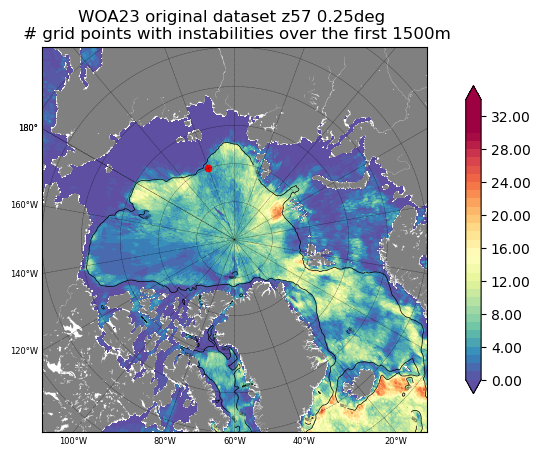

In [21]:
plt.figure(figsize=(10,5))
Arc_Bat(ztype='isol500')
m=Arc_plot(lon2D,lat2D,ds_IN['Instab'],np.arange(0,35),[0.,30.],zmy_cmap='Spectral_r')
x,y = m(loc_x,loc_y)
m.scatter(x,y,20,marker='o', color='r')
plt.title( 'WOA23 original dataset z57 0.25deg \n # grid points with instabilities over the first 1500m')

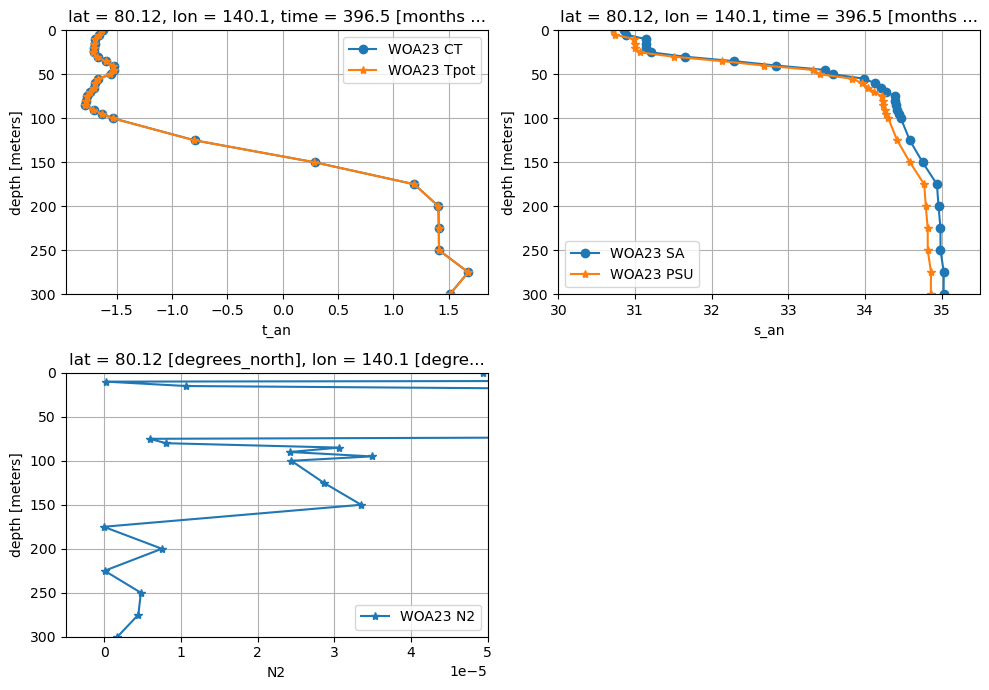

In [28]:
plt.figure(figsize=(10,7))
zdep=300.

plt.subplot(221)
ds_IN['CT'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='o',label='WOA23 CT')
ds_IN['t_an'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*',label='WOA23 Tpot')
plt.ylim([zdep,0.])
plt.grid(True)
plt.legend()

plt.subplot(222)
ds_IN['SA'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='o',label='WOA23 SA')
ds_IN['s_an'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*',label='WOA23 PSU')
plt.xlim([30,35.5])
plt.ylim([zdep,0.])
plt.grid(True)
plt.legend()

if True:
    plt.subplot(223)
    ds_N2['N2'].sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='*',label='WOA23 N2')
    plt.xlim([-0.5e-5,5e-5])
    plt.ylim([zdep,0.])
    plt.grid(True)
    plt.legend()

plt.tight_layout()

In [29]:
print(ds_N2['N2'].sel(lat=loc_y,lon=loc_x,method='nearest'))

<xarray.DataArray 'N2' (depth: 56)>
array([ 4.93961838e-05,  3.91832164e-04,  1.99171026e-07,  1.06809869e-05,
        9.00919730e-05,  6.86690109e-04,  9.66482784e-04,  8.39168569e-04,
        9.78416208e-04,  1.56269620e-04,  6.40743136e-04,  2.08650814e-04,
        1.27080372e-04,  1.02830658e-04,  1.79226519e-04,  5.93337759e-06,
        8.05217804e-06,  3.06547386e-05,  2.42275252e-05,  3.49050224e-05,
        2.44078856e-05,  2.86471130e-05,  3.35167633e-05, -7.14114277e-08,
        7.52027006e-06,  4.77808838e-08,  4.78111962e-06,  4.44922754e-06,
        1.72744162e-06,  2.35966086e-06,  2.77048598e-06,  1.73031990e-06,
        3.83923804e-06,  4.02018265e-06,  3.39146478e-06,  2.63618351e-06,
        3.10426111e-06,  2.53057019e-06,  2.63495503e-06,  1.96309422e-06,
        8.51122919e-07,  4.67253097e-06,  1.42099288e-06,  3.42427519e-06,
        4.88986734e-07,  7.90802307e-09,  2.35516175e-08,  1.07767851e-06,
        6.97750222e-07,  9.71144328e-07,  4.78009909e-07,  1.427